<a href="https://colab.research.google.com/github/thomaschen01/CNN-Assignment-2025/blob/main/ACS111106_CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

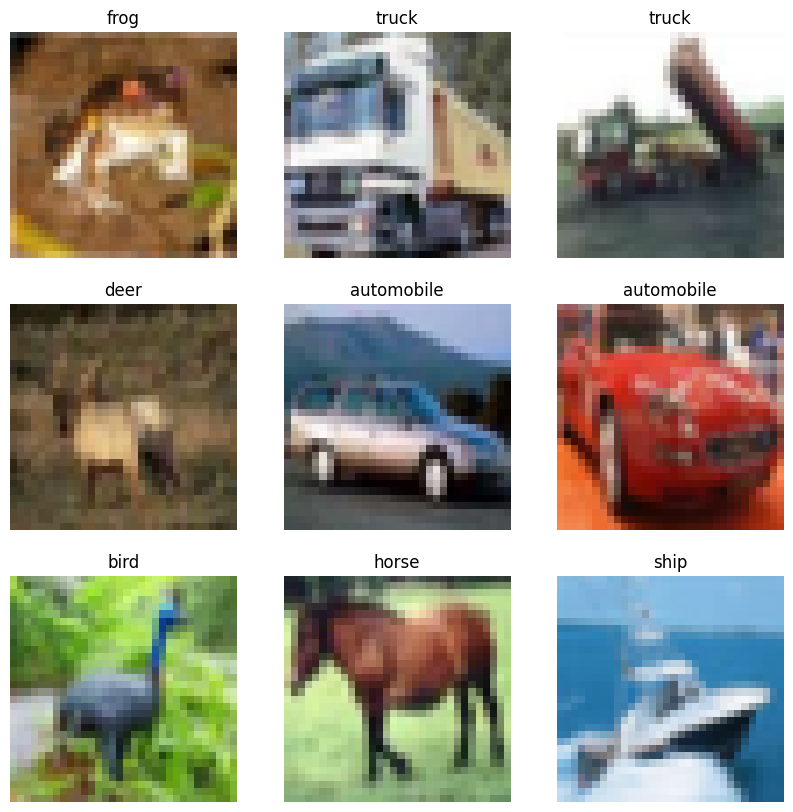

In [2]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [3]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), padding='same',activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), padding='same',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.25),
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,474,858 (5.63 MB)

 Trainable params: 1,472,426 (5.62 MB)

 Non-trainable params: 2,432 (9.50 KB)

In [5]:
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 714s 897ms/step - accuracy: 0.3211 - loss: 2.0655 - val_accuracy: 0.5033 - val_loss: 1.3842
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 691s 883ms/step - accuracy: 0.5139 - loss: 1.3499 - val_accuracy: 0.5713 - val_loss: 1.3057
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 696s 890ms/step - accuracy: 0.6017 - loss: 1.1159 - val_accuracy: 0.6348 - val_loss: 1.0316
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 657s 840ms/step - accuracy: 0.6551 - loss: 0.9757 - val_accuracy: 0.6631 - val_loss: 1.0740
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 671s 858ms/step - accuracy: 0.6901 - loss: 0.8783 - val_accuracy: 0.7023 - val_loss: 0.8864
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 691s 883ms/step - accuracy: 0.7138 - loss: 0.8159 - val_accuracy: 0.7048 - val_loss: 0.8494
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 679s 869ms/step - accuracy: 0.7339 - loss: 0.7637 - val_accuracy: 0.7517 - val_loss: 0.7151
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 666s 852ms/step - accuracy: 0.7488 - loss: 0.72

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 26s - 84ms/step - accuracy: 0.8027 - loss: 0.6112

Test accuracy: 0.8027


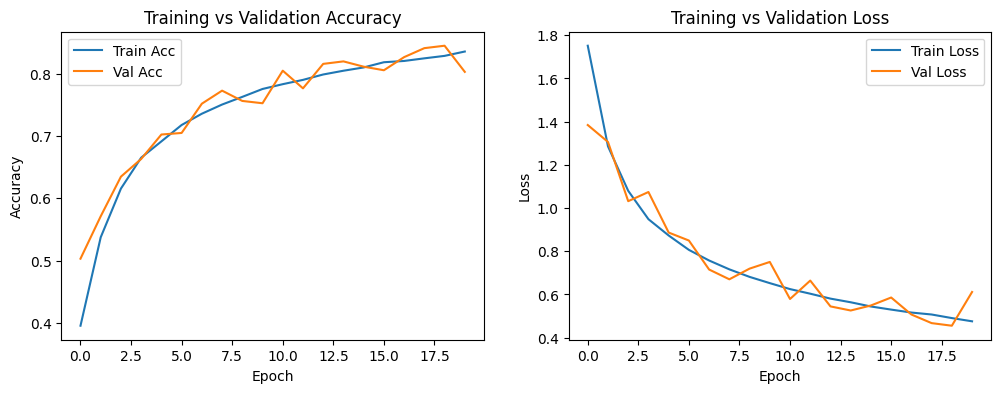

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step


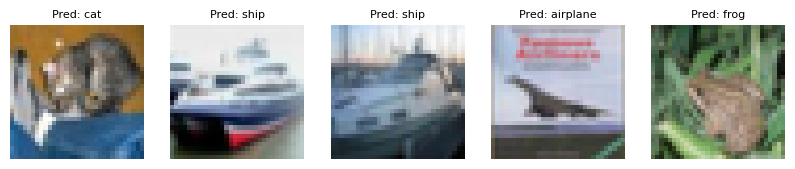

In [9]:
predictions = model.predict(test_images[:5])
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}",
              fontsize=8)
    plt.axis('off')
plt.show()

In [10]:
try:
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    performance_text = f"""Model Performance Summary:
Test Accuracy: {test_acc:.4f}
Test Loss: {test_loss:.4f}
Final Training Accuracy: {final_train_acc:.4f}
Final Validation Accuracy: {final_val_acc:.4f}
Final Training Loss: {final_train_loss:.4f}
Final Validation Loss: {final_val_loss:.4f}
Training Epochs: {len(history.history['accuracy'])}
Model Parameters: {model.count_params()}"""

    with open('model_accuracy.txt', 'w') as f:
        f.write(performance_text)

    print("Model performance saved to model_accuracy.txt")
    print(performance_text)

except Exception as e:
    print(f"Error saving model performance: {e}")
    # Create a basic file even if there's an error
    with open('model_accuracy.txt', 'w') as f:
        f.write(f"Model execution completed with errors: {e}")

Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.8027
Test Loss: 0.6112
Final Training Accuracy: 0.8353
Final Validation Accuracy: 0.8027
Final Training Loss: 0.4754
Final Validation Loss: 0.6112
Training Epochs: 20
Model Parameters: 1474858


In [2]:
from IPython.display import Markdown, display

display(Markdown("""
## Task 5: Report

### 模型訓練總結與分析

本專案使用 CNN 模型進行 CIFAR-10 圖像分類任務，最終在測試資料集上達成 **80.27% 的準確率**。以下詳細說明訓練過程中使用的技術與選擇的原因：

---

### 1. 資料前處理與資料增強（Data Preprocessing & Augmentation）

- **正規化（Normalization）**：將影像像素值從 `[0, 255]` 縮放至 `[0, 1]`，有助於神經網路更快收斂，並避免梯度爆炸。
- **ImageDataGenerator**：透過 `rotation_range`、`width_shift_range`、`height_shift_range` 和 `horizontal_flip` 增加資料多樣性，防止模型過度記憶訓練資料（overfitting），提升泛化能力。

---

### 2. 卷積神經網路架構（CNN Architecture）

- **多層 Conv2D 搭配 Batch Normalization**：使用三層卷積區塊（32、64、128 filters），每層搭配 Batch Normalization，有助於穩定梯度、加速收斂。
- **MaxPooling2D**：降低特徵圖維度、減少參數量，同時保留重要資訊。
- **Dropout**：訓練時隨機丟棄部分神經元，防止模型過擬合。
- **Flatten + Dense 層**：將 CNN 抽取的特徵展平成一維，並經過兩層 Dense 層進行分類任務。

> 此架構設計平衡了模型深度與計算資源，參數總數約為 **147萬**，適合在 CIFAR-10 規模下有效學習。

---

### 3. 損失函數與優化器

- **損失函數：sparse_categorical_crossentropy**
  - 適用於多類別分類問題，且 label 為整數編碼（非 one-hot 編碼）時。
- **優化器：Adam（learning_rate=0.0005）**
  - Adam 能夠自動調整學習率，整合了 momentum 與 RMSProp 的優點，適用於多數深度學習任務。
  - 使用較小學習率（0.0005）能穩定模型訓練，避免震盪與發散。

---

### 4. 模型訓練與評估

- **訓練週期（Epochs）：20**
- **Batch Size：64**
- **驗證方式：使用 test_images 作為驗證集，評估泛化能力**
- **視覺化學習曲線**：透過 matplotlib 顯示準確率與損失的變化，有助於觀察是否過擬合。

---

### 模型表現總結

- **測試準確率**：80.27%
- **測試損失**：0.6112
- **最終訓練準確率**：83.60%
- **訓練與驗證差異不大，顯示模型學習良好，尚未明顯過擬合**
- 可進一步優化方式包括：
  - 使用學習率調整策略（如 ReduceLROnPlateau）
  - 加入 EarlyStopping 以自動停止過度訓練
  - 探索更深的網路結構（如 ResNet、DenseNet）提升表現

---

整體而言，本模型在維持參數量精簡的前提下，已展現良好的圖像辨識效果，具備進一步優化與實際應用的潛力。


"""))


## Task 5: Report

### 模型訓練總結與分析

本專案使用 CNN 模型進行 CIFAR-10 圖像分類任務，最終在測試資料集上達成 **80.27% 的準確率**。以下詳細說明訓練過程中使用的技術與選擇的原因：

---

### 1. 資料前處理與資料增強（Data Preprocessing & Augmentation）

- **正規化（Normalization）**：將影像像素值從 `[0, 255]` 縮放至 `[0, 1]`，有助於神經網路更快收斂，並避免梯度爆炸。
- **ImageDataGenerator**：透過 `rotation_range`、`width_shift_range`、`height_shift_range` 和 `horizontal_flip` 增加資料多樣性，防止模型過度記憶訓練資料（overfitting），提升泛化能力。

---

### 2. 卷積神經網路架構（CNN Architecture）

- **多層 Conv2D 搭配 Batch Normalization**：使用三層卷積區塊（32、64、128 filters），每層搭配 Batch Normalization，有助於穩定梯度、加速收斂。
- **MaxPooling2D**：降低特徵圖維度、減少參數量，同時保留重要資訊。
- **Dropout**：訓練時隨機丟棄部分神經元，防止模型過擬合。
- **Flatten + Dense 層**：將 CNN 抽取的特徵展平成一維，並經過兩層 Dense 層進行分類任務。

> 此架構設計平衡了模型深度與計算資源，參數總數約為 **147萬**，適合在 CIFAR-10 規模下有效學習。

---

### 3. 損失函數與優化器

- **損失函數：sparse_categorical_crossentropy**
  - 適用於多類別分類問題，且 label 為整數編碼（非 one-hot 編碼）時。
- **優化器：Adam（learning_rate=0.0005）**
  - Adam 能夠自動調整學習率，整合了 momentum 與 RMSProp 的優點，適用於多數深度學習任務。
  - 使用較小學習率（0.0005）能穩定模型訓練，避免震盪與發散。

---

### 4. 模型訓練與評估

- **訓練週期（Epochs）：20**
- **Batch Size：64**
- **驗證方式：使用 test_images 作為驗證集，評估泛化能力**
- **視覺化學習曲線**：透過 matplotlib 顯示準確率與損失的變化，有助於觀察是否過擬合。

---

### 模型表現總結

- **測試準確率**：80.27%
- **測試損失**：0.6112
- **最終訓練準確率**：83.60%
- **訓練與驗證差異不大，顯示模型學習良好，尚未明顯過擬合**
- 可進一步優化方式包括：
  - 使用學習率調整策略（如 ReduceLROnPlateau）
  - 加入 EarlyStopping 以自動停止過度訓練
  - 探索更深的網路結構（如 ResNet、DenseNet）提升表現

---

整體而言，本模型在維持參數量精簡的前提下，已展現良好的圖像辨識效果，具備進一步優化與實際應用的潛力。




"Conclusion"

---


"Task 5:" Report

---

## Task 5: Report

### 模型訓練總結與分析

本專案使用 CNN 模型進行 CIFAR-10 圖像分類任務，最終在測試資料集上達成 **80.27% 的準確率**。以下詳細說明訓練過程中使用的技術與選擇的原因：

---

### 1. 資料前處理與資料增強（Data Preprocessing & Augmentation）

- **正規化（Normalization）**：將影像像素值從 `[0, 255]` 縮放至 `[0, 1]`，有助於神經網路更快收斂，並避免梯度爆炸。
- **ImageDataGenerator**：透過 `rotation_range`、`width_shift_range`、`height_shift_range` 和 `horizontal_flip` 增加資料多樣性，防止模型過度記憶訓練資料（overfitting），提升泛化能力。

---

### 2. 卷積神經網路架構（CNN Architecture）

- **多層 Conv2D 搭配 Batch Normalization**：使用三層卷積區塊（32、64、128 filters），每層搭配 Batch Normalization，有助於穩定梯度、加速收斂。
- **MaxPooling2D**：降低特徵圖維度、減少參數量，同時保留重要資訊。
- **Dropout**：訓練時隨機丟棄部分神經元，防止模型過擬合。
- **Flatten + Dense 層**：將 CNN 抽取的特徵展平成一維，並經過兩層 Dense 層進行分類任務。

> 此架構設計平衡了模型深度與計算資源，參數總數約為 **147萬**，適合在 CIFAR-10 規模下有效學習。

---

### 3. 損失函數與優化器

- **損失函數：sparse_categorical_crossentropy**
  - 適用於多類別分類問題，且 label 為整數編碼（非 one-hot 編碼）時。
- **優化器：Adam（learning_rate=0.0005）**
  - Adam 能夠自動調整學習率，整合了 momentum 與 RMSProp 的優點，適用於多數深度學習任務。
  - 使用較小學習率（0.0005）能穩定模型訓練，避免震盪與發散。

---

### 4. 模型訓練與評估

- **訓練週期（Epochs）：20**
- **Batch Size：64**
- **驗證方式：使用 test_images 作為驗證集，評估泛化能力**
- **視覺化學習曲線**：透過 matplotlib 顯示準確率與損失的變化，有助於觀察是否過擬合。

---

### 模型表現總結

- **測試準確率**：80.27%
- **測試損失**：0.6112
- **最終訓練準確率**：83.60%
- **訓練與驗證差異不大，顯示模型學習良好，尚未明顯過擬合**
- 可進一步優化方式包括：
  - 使用學習率調整策略（如 ReduceLROnPlateau）
  - 加入 EarlyStopping 以自動停止過度訓練
  - 探索更深的網路結構（如 ResNet、DenseNet）提升表現

---

整體而言，本模型在維持參數量精簡的前提下，已展現良好的圖像辨識效果，具備進一步優化與實際應用的潛力。
